In [1]:
import psycopg2
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import io
import schedule
import time
from datetime import date, timedelta
import win32com.client as win32
import teradatasql
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import telebot
import logging

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [130]:
df=pd.read_csv('tmp_ak_home_tile_nps_fbc.csv')
pd.set_option('display.max_columns', 100) 
df

,subs_id,report_date,branch_id,region_nps,region_tele2,ts1m,operator,ltr,nps,nps_category,home_sector,maxdata_sector,home_lon,home_lat,maxdata_lon,maxdata_lat,home_tile,maxdata_tile,s2_cell_id_13,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,gap_2sec,gap_3sec,gap_4sec
0,25546130,01.02.2023,3.0,Ростов на Дону,Ростов-на-Дону,01.02.2023,Tele2,10.0,1,Promoter,RO2268_2,RO2268_2,38.937500,47.743056,38.937500,47.743056,4675029209721077760,4675029209721077760,4675029209721077760,144,1971,34,16,10,0.017250,0.008118,0.005074,0.008832,0.000000,0.000000,0.008418,0.008118,0.005074
1,60285885,01.02.2023,3.0,Ростов на Дону,Ростов-на-Дону,01.02.2023,Tele2,10.0,1,Promoter,RO0461_1,RO0461_1,38.368700,47.331300,38.368700,47.331300,4675076797958717440,4675076797958717440,4675076797958717440,154,293,54,24,16,0.184300,0.081911,0.054608,0.008832,0.000000,0.000000,0.175468,0.081911,0.054608
2,54927720,01.03.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.03.2022,Tele2,8.0,0,Passive,RO0461_1,RO0461_1,38.368700,47.331300,38.368700,47.331300,4675076797958717440,4675076797958717440,4675076797958717440,132,187,15,3,2,0.080214,0.016043,0.010695,0.002866,0.000000,0.000000,0.077348,0.016043,0.010695
3,35315057,01.12.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.12.2022,Tele2,10.0,1,Promoter,RO2046_3,RO2046_3,38.629722,47.349722,38.629722,47.349722,4675094802461622272,4675094802461622272,4675094802461622272,936,5039,447,205,109,0.088708,0.040683,0.021631,0.006432,0.000000,0.000000,0.082276,0.040683,0.021631
4,55758248,01.12.2022,3.0,Ростов на Дону,Ростов-на-Дону,01.12.2022,Tele2,10.0,1,Promoter,RO5046_3,RO5046_3,38.629722,47.349722,38.629722,47.349722,4675094802461622272,4675094802461622272,4675094802461622272,936,5039,447,205,109,0.088708,0.040683,0.021631,0.006432,0.000000,0.000000,0.082276,0.040683,0.021631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585239,100068496128,01.03.2022,68.0,Владивосток,Владивосток,01.03.2022,Tele2,7.0,0,Passive,VV0625_3,VV0625_3,131.892500,43.022778,131.892500,43.022778,6896124439646175232,6896124439646175232,6896124439646175232,19292,49727,20419,8966,5046,0.410622,0.180304,0.101474,0.112615,0.016604,0.000171,0.298007,0.163701,0.101303
585240,100056576311,01.02.2023,68.0,Владивосток,Владивосток,01.02.2023,Tele2,10.0,1,Promoter,VV0073_1,VV0073_2,131.391151,42.853379,131.391151,42.853379,6896252979427409920,6896252979427409920,6896252979427409920,2079,5580,2411,1351,813,0.432079,0.242115,0.145699,0.075858,0.013927,0.000000,0.356221,0.228188,0.145699
585241,100065750247,01.03.2022,68.0,Владивосток,Владивосток,01.03.2022,Tele2,8.0,0,Passive,VV0073_3,VV0073_3,131.391151,42.853379,131.391151,42.853379,6896252979427409920,6896252979427409920,6896252979427409920,1449,1761,936,458,257,0.531516,0.260080,0.145940,0.112615,0.016604,0.000171,0.418901,0.243476,0.145769
585242,100079247545,01.05.2022,68.0,Владивосток,Владивосток,01.05.2022,Tele2,10.0,1,Promoter,VV3306_3,VV3306_3,131.492414,42.981965,131.492414,42.981965,6896260538569850880,6896260538569850880,6896260538569850880,84,190,33,4,2,0.173684,0.021053,0.010526,0.098867,0.011044,0.000000,0.074817,0.010008,0.010526


In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [8]:
df.describe()

,subs_id,branch_id,ltr,nps,home_lon,home_lat,maxdata_lon,maxdata_lat,home_tile,maxdata_tile,s2_cell_id_13,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,gap_2sec,gap_3sec,gap_4sec
count,5.852340e+05,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,5.852340e+05,5.852340e+05,5.852340e+05,5.852340e+05,5.852340e+05,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000,585234.000000
mean,1.384523e+11,46.982363,7.498949,0.248863,52.791915,54.771226,52.399178,54.387214,5.018976e+18,4.993557e+18,5.018976e+18,8.687389e+04,1.519398e+05,26734.093243,13326.156389,7909.684576,0.174182,0.085719,0.051066,0.012392,0.001045,0.000145,0.161790,0.084674,0.050922
std,1.087756e+11,37.544015,3.171996,0.891926,23.592892,4.058302,23.903081,6.099930,5.732418e+17,6.550594e+17,5.732418e+17,1.260011e+05,2.095898e+05,38784.855631,19431.847871,11494.798181,0.074271,0.045356,0.032785,0.024806,0.005429,0.001552,0.066262,0.044362,0.032599
min,1.583650e+05,2.000000,1.000000,-1.000000,19.885462,42.421700,0.000000,0.000000,4.675029e+18,1.152922e+18,4.675029e+18,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.469622,-0.249358,-0.180605
25%,6.552170e+07,14.000000,5.000000,-1.000000,37.662139,52.752455,37.619738,52.651389,4.702970e+18,4.702229e+18,4.702970e+18,7.028000e+03,1.497100e+04,2345.000000,1090.000000,624.000000,0.130680,0.060657,0.034615,0.001636,0.000000,0.000000,0.123444,0.060218,0.034561
50%,1.000728e+11,35.000000,9.000000,1.000000,41.900333,55.345791,41.601111,55.326917,4.859281e+18,4.860097e+18,4.859281e+18,3.782800e+04,7.403500e+04,12612.000000,6231.000000,3705.000000,0.166542,0.080799,0.047346,0.008801,0.000000,0.000000,0.156673,0.080169,0.047266
75%,2.000878e+11,69.000000,10.000000,1.000000,61.282947,56.627016,61.226500,56.602512,5.086590e+18,5.086737e+18,5.086590e+18,1.176760e+05,2.032060e+05,35158.000000,17546.750000,10429.000000,0.206317,0.104013,0.062423,0.016495,0.000000,0.000000,0.193185,0.102964,0.062270
max,3.000675e+11,177.000000,10.000000,1.000000,162.585474,71.982945,162.585474,71.982945,6.896610e+18,6.896610e+18,6.896610e+18,1.413664e+06,1.928769e+06,397448.000000,202356.000000,118198.000000,1.000000,1.000000,1.000000,0.521219,0.268966,0.186207,1.000000,1.000000,1.000000


<Axes: >

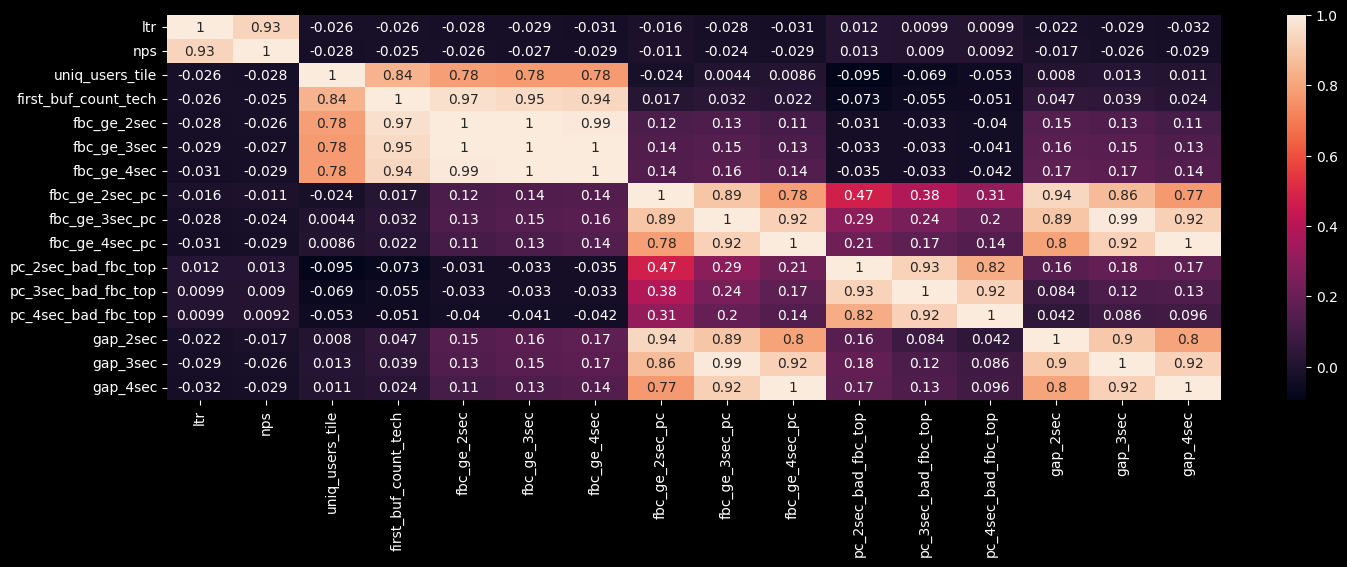

In [133]:
corr_matrix = df[['ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech', 'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',
       'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc',
       'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top',
       'gap_2sec', 'gap_3sec', 'gap_4sec']].corr()
fig, ax = plt.subplots(figsize = (17,5))
sns.heatmap(corr_matrix, annot=True)
#sns.pairplot(corr_matrix, kind='reg')

In [ ]:
display(df.groupby(['report_date','home_tile'], as_index = False).agg({'subs_id': "count"}).sort_values(by = 'subs_id', ascending = False))
display(df.groupby(['home_tile'], as_index = False).agg({'subs_id': "count"}).sort_values(by = 'subs_id', ascending = False))

In [137]:
#test
rd = '01.12.2022'
ht = [4702885886566596608, 4702893102111653888, 4702899321224298496]
df.query("region_nps == 'Мордовия' and report_date ==@rd and home_tile == @ht ")

,subs_id,report_date,branch_id,region_nps,region_tele2,ts1m,operator,ltr,nps,nps_category,home_sector,maxdata_sector,home_lon,home_lat,maxdata_lon,maxdata_lat,home_tile,maxdata_tile,s2_cell_id_13,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,fbc_ge_2sec_pc,fbc_ge_3sec_pc,fbc_ge_4sec_pc,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top,gap_2sec,gap_3sec,gap_4sec
6773,51189110,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,10.0,1,Promoter,MV0422_1,MV0422_1,44.951455,54.058100,44.951455,54.058100,4702885886566596608,4702885886566596608,4702885886566596608,35160,63328,17339,9756,6229,0.273797,0.154055,0.098361,0.024504,0.001723,0.0,0.249293,0.152332,0.098361
6774,65429859,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,5.0,-1,Detractor,MV0422_1,MV0169_2,44.951455,54.058100,44.953969,54.066361,4702885886566596608,4702885886566596608,4702885886566596608,35160,63328,17339,9756,6229,0.273797,0.154055,0.098361,0.024504,0.001723,0.0,0.249293,0.152332,0.098361
6784,51488815,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,8.0,0,Passive,MV0838_2,MV0464_1,45.215418,54.174561,45.183161,54.190512,4702893102111653888,4702893548788252672,4702893102111653888,58464,103102,21800,11259,6801,0.211441,0.109203,0.065964,0.024504,0.001723,0.0,0.186937,0.107480,0.065964
6803,48839600,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,3.0,-1,Detractor,MV0017_2,MV0017_2,45.116227,54.292512,45.116227,54.292512,4702899321224298496,4702899321224298496,4702899321224298496,12090,73877,11919,5331,2877,0.161336,0.072160,0.038943,0.024504,0.001723,0.0,0.136832,0.070438,0.038943
6804,62809104,01.12.2022,51.0,Мордовия,Саранск,01.12.2022,Tele2,8.0,0,Passive,MV0017_2,MV0017_2,45.116227,54.292512,45.116227,54.292512,4702899321224298496,4702899321224298496,4702899321224298496,12090,73877,11919,5331,2877,0.161336,0.072160,0.038943,0.024504,0.001723,0.0,0.136832,0.070438,0.038943


In [138]:
t = df.groupby(['report_date', 'region_nps', 'home_tile', 'ltr',	'nps'], 
                as_index = False).agg({'subs_id': "count", 
                                        'uniq_users_tile':'mean', 'first_buf_count_tech':'mean', 'fbc_ge_2sec':'mean', 'fbc_ge_3sec':'mean', 'fbc_ge_4sec': 'mean',
                                        'pc_2sec_bad_fbc_top':'mean',	'pc_3sec_bad_fbc_top':'mean', 'pc_4sec_bad_fbc_top':"mean"})
#test                                         
rd = '01.12.2022'
ht = [4702885886566596608, 4702893102111653888, 4702899321224298496]
t.query("region_nps == 'Мордовия' and report_date ==@rd and home_tile == @ht ")

,report_date,region_nps,home_tile,ltr,nps,subs_id,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top
431162,01.12.2022,Мордовия,4702885886566596608,5.0,-1,1,35160.0,63328.0,17339.0,9756.0,6229.0,0.024504,0.001723,0.0
431163,01.12.2022,Мордовия,4702885886566596608,10.0,1,1,35160.0,63328.0,17339.0,9756.0,6229.0,0.024504,0.001723,0.0
431176,01.12.2022,Мордовия,4702893102111653888,8.0,0,1,58464.0,103102.0,21800.0,11259.0,6801.0,0.024504,0.001723,0.0
431208,01.12.2022,Мордовия,4702899321224298496,3.0,-1,1,12090.0,73877.0,11919.0,5331.0,2877.0,0.024504,0.001723,0.0
431209,01.12.2022,Мордовия,4702899321224298496,8.0,0,1,12090.0,73877.0,11919.0,5331.0,2877.0,0.024504,0.001723,0.0


In [139]:
#считаем метрики на город
t_sv = t.groupby(['report_date', 'region_nps'], 
                as_index = False).agg({'subs_id': "sum", 'ltr':'mean',	'nps':'mean',
                                        'uniq_users_tile':'sum', 'first_buf_count_tech':'sum', 'fbc_ge_2sec':'sum', 'fbc_ge_3sec':'sum', 'fbc_ge_4sec': 'sum',
                                        'pc_2sec_bad_fbc_top':'mean',	'pc_3sec_bad_fbc_top':'mean', 'pc_4sec_bad_fbc_top':"mean"})
t_sv

,report_date,region_nps,subs_id,ltr,nps,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top
0,01.01.2022,Архангельск,310,6.896825,0.059524,22005638.0,59893768.0,10929177.0,5508220.0,3379719.0,0.014759,0.000659,0.000000
1,01.01.2022,Барнаул,161,8.365517,0.420690,2877265.0,3272595.0,603140.0,280417.0,161897.0,0.025045,0.000672,0.000020
2,01.01.2022,Белгород,586,7.167015,0.123173,27339461.0,37624677.0,7197118.0,3891027.0,2491830.0,0.003330,0.000013,0.000003
3,01.01.2022,Биробиджан,60,7.642857,0.333333,110569.0,211891.0,55552.0,21292.0,11069.0,0.179679,0.034442,0.014054
4,01.01.2022,Брянск,310,7.026616,0.106464,13473352.0,18068563.0,2870991.0,1516968.0,956426.0,0.009320,0.000010,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,01.12.2022,Хакасия,305,7.778210,0.338521,7428515.0,15063136.0,3497497.0,1677589.0,965768.0,0.029950,0.004900,0.000554
1000,01.12.2022,Челябинск,2884,6.716453,0.054842,274349515.0,616199126.0,125570104.0,61264958.0,35005670.0,0.004216,0.000097,0.000017
1001,01.12.2022,Чувашия,376,7.538983,0.291525,19870473.5,36938730.5,7437677.5,3735829.0,2167144.5,0.014847,0.000760,0.000000
1002,01.12.2022,ЯНАО,260,6.966667,0.128571,9167890.0,28173768.0,6007110.5,2974530.0,1756338.5,0.027323,0.003147,0.000001


<Axes: >

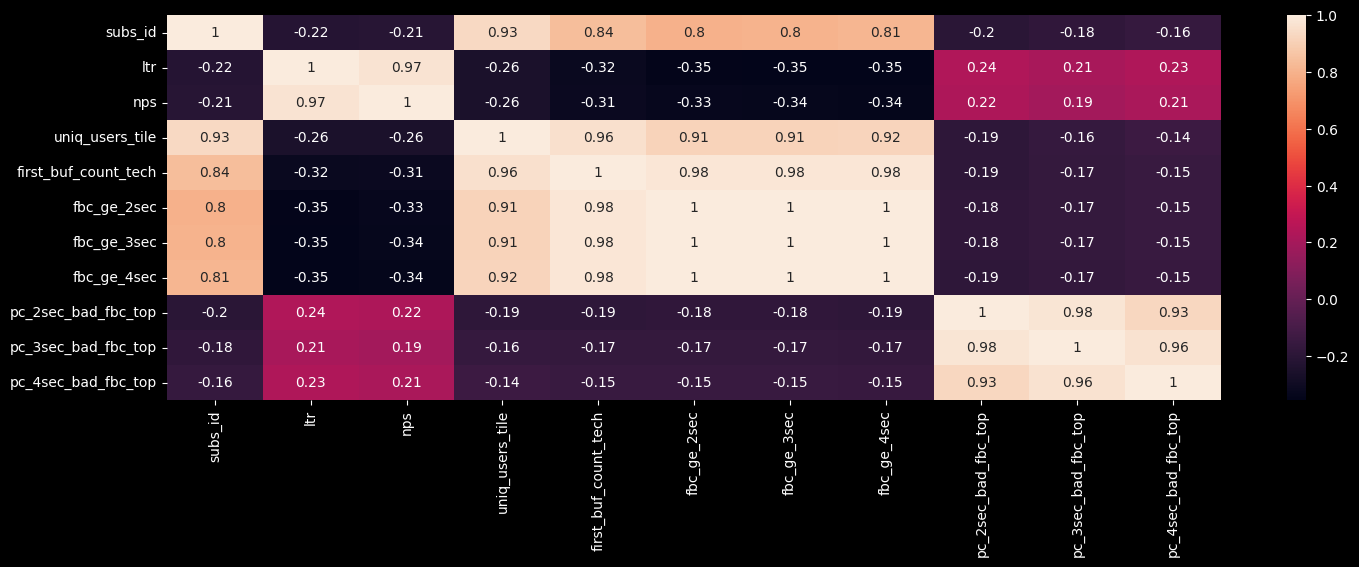

In [141]:
fig, ax = plt.subplots(figsize = (17, 5))
corr=t_sv[['subs_id', 'ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech', 'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec', 'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top' ]].corr()

sns.heatmap(corr, annot = True)

In [120]:
"""t = df.groupby(['report_date', 'region_nps', 'home_tile'], as_index = False).agg({'subs_id': "count", "ltr":"mean",
                                                 "nps":"mean", 'fbc_ge_2sec_pc':"mean",	'fbc_ge_3sec_pc':"mean",	
                                                 'fbc_ge_4sec_pc':"mean", 'gap_2sec':"mean",	'gap_3sec':"mean",
                                                 'gap_4sec':"mean"}).sort_values(by = ['home_tile', 'report_date'], ascending = False).query('subs_id>=0')
t"""

't = df.groupby([\'report_date\', \'region_nps\', \'home_tile\'], as_index = False).agg({\'subs_id\': "count", "ltr":"mean",\n                                                 "nps":"mean", \'fbc_ge_2sec_pc\':"mean",\t\'fbc_ge_3sec_pc\':"mean",\t\n                                                 \'fbc_ge_4sec_pc\':"mean", \'gap_2sec\':"mean",\t\'gap_3sec\':"mean",\n                                                 \'gap_4sec\':"mean"}).sort_values(by = [\'home_tile\', \'report_date\'], ascending = False).query(\'subs_id>=0\')\nt'

In [142]:
t = t_sv.copy()
t

,report_date,region_nps,subs_id,ltr,nps,uniq_users_tile,first_buf_count_tech,fbc_ge_2sec,fbc_ge_3sec,fbc_ge_4sec,pc_2sec_bad_fbc_top,pc_3sec_bad_fbc_top,pc_4sec_bad_fbc_top
0,01.01.2022,Архангельск,310,6.896825,0.059524,22005638.0,59893768.0,10929177.0,5508220.0,3379719.0,0.014759,0.000659,0.000000
1,01.01.2022,Барнаул,161,8.365517,0.420690,2877265.0,3272595.0,603140.0,280417.0,161897.0,0.025045,0.000672,0.000020
2,01.01.2022,Белгород,586,7.167015,0.123173,27339461.0,37624677.0,7197118.0,3891027.0,2491830.0,0.003330,0.000013,0.000003
3,01.01.2022,Биробиджан,60,7.642857,0.333333,110569.0,211891.0,55552.0,21292.0,11069.0,0.179679,0.034442,0.014054
4,01.01.2022,Брянск,310,7.026616,0.106464,13473352.0,18068563.0,2870991.0,1516968.0,956426.0,0.009320,0.000010,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,01.12.2022,Хакасия,305,7.778210,0.338521,7428515.0,15063136.0,3497497.0,1677589.0,965768.0,0.029950,0.004900,0.000554
1000,01.12.2022,Челябинск,2884,6.716453,0.054842,274349515.0,616199126.0,125570104.0,61264958.0,35005670.0,0.004216,0.000097,0.000017
1001,01.12.2022,Чувашия,376,7.538983,0.291525,19870473.5,36938730.5,7437677.5,3735829.0,2167144.5,0.014847,0.000760,0.000000
1002,01.12.2022,ЯНАО,260,6.966667,0.128571,9167890.0,28173768.0,6007110.5,2974530.0,1756338.5,0.027323,0.003147,0.000001


добавляем расчетные метрики

In [145]:
t['fbc_ge_2sec_pc'] = t['fbc_ge_2sec']/t['first_buf_count_tech']
t['fbc_ge_3sec_pc'] = t['fbc_ge_3sec']/t['first_buf_count_tech']
t['fbc_ge_4sec_pc'] = t['fbc_ge_4sec']/t['first_buf_count_tech']
t['gap_2sec'] = t['fbc_ge_2sec_pc']-t['pc_2sec_bad_fbc_top']
t['gap_3sec'] = t['fbc_ge_3sec_pc']-t['pc_3sec_bad_fbc_top']
t['gap_4sec'] = t['fbc_ge_4sec_pc']-t['pc_4sec_bad_fbc_top']

<Axes: >

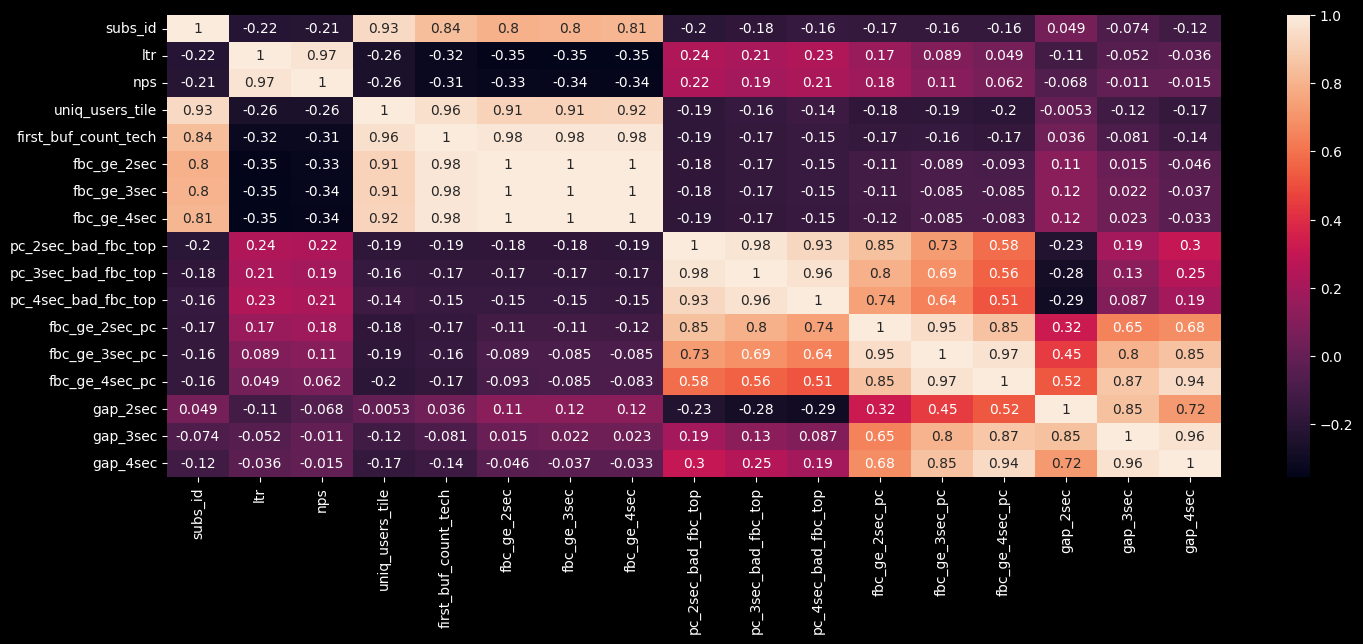

In [157]:
ax, fig = plt.subplots(figsize = (17, 6))
sns.heatmap(t[['subs_id','ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech', 'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',
       'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top',
       'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc', 'gap_2sec',
       'gap_3sec', 'gap_4sec']].corr(), annot = True)

In [194]:
df.query("region_nps == 'Мордовия' ").groupby(['report_date', 'region_nps', 'home_tile', 'ltr',	'nps'], 
                as_index = False).agg({'subs_id': "count", 
                                        'uniq_users_tile':'mean', 'first_buf_count_tech':'mean', 'fbc_ge_2sec':'mean', 'fbc_ge_3sec':'mean', 'fbc_ge_4sec': 'mean',
                                        'pc_2sec_bad_fbc_top':'mean',	'pc_3sec_bad_fbc_top':'mean', 'pc_4sec_bad_fbc_top':"mean"}).to_excel('qweqwe.xlsx')

<Axes: >

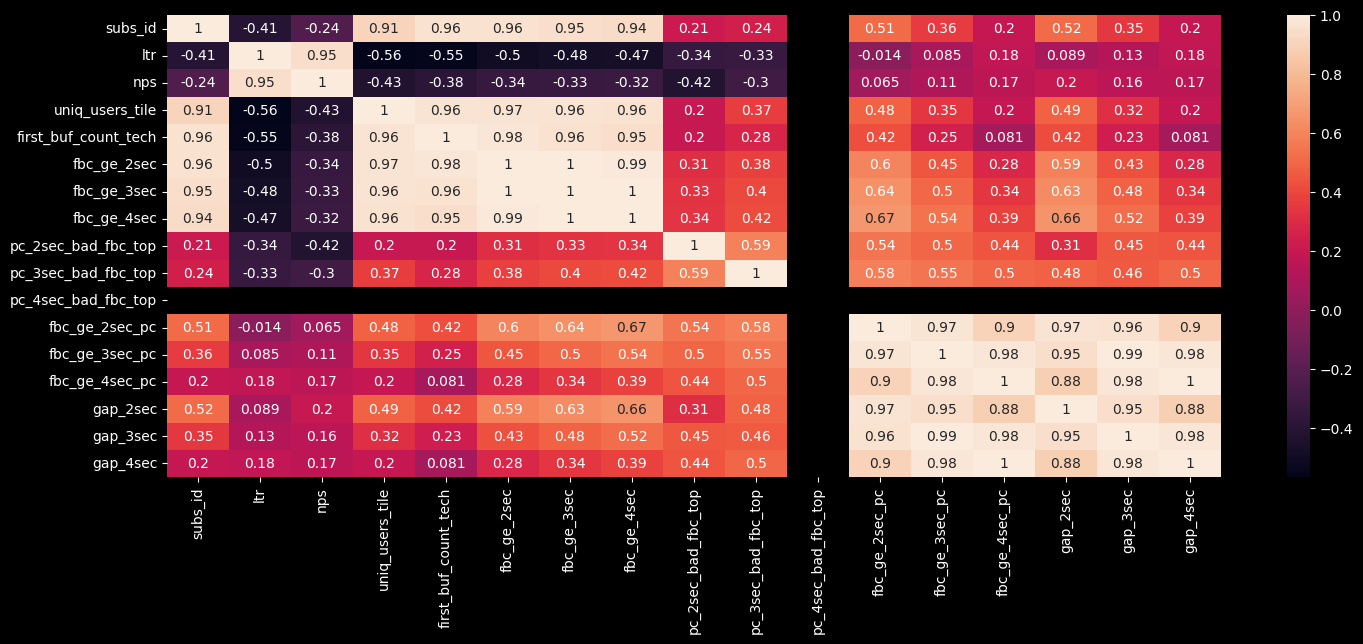

In [184]:
ax, fig = plt.subplots(figsize = (17, 6))
sns.heatmap(t.query("region_nps == 'Мордовия' ")[['subs_id','ltr', 'nps', 'uniq_users_tile',
       'first_buf_count_tech', 'fbc_ge_2sec', 'fbc_ge_3sec', 'fbc_ge_4sec',
       'pc_2sec_bad_fbc_top', 'pc_3sec_bad_fbc_top', 'pc_4sec_bad_fbc_top',
       'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc', 'gap_2sec',
       'gap_3sec', 'gap_4sec']].corr(), annot = True)

In [ ]:
t1 = t.dropna()#subset='gap_4sec'
t1.isna().sum()

Уравнение регрессии: y = -1.5468415991831705e-07x + 7.68; R² = 0.25


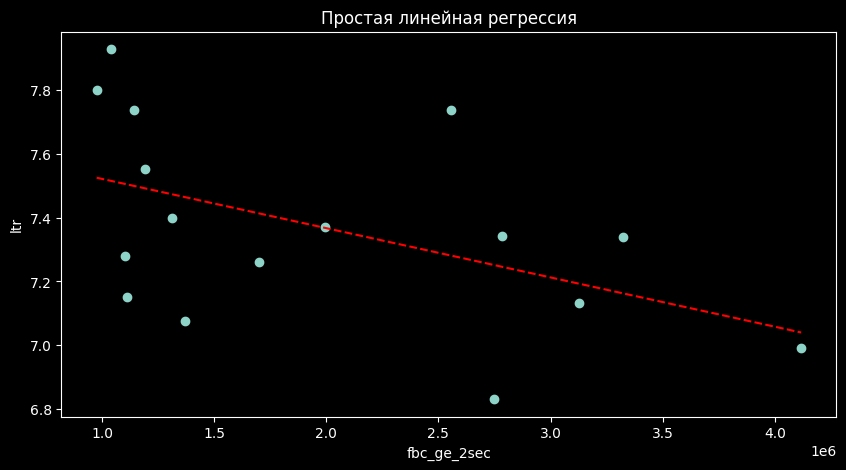

In [200]:
X = t1['fbc_ge_2sec']
y = t1['ltr']
# Создать и обучить модель множественной регрессии на исходных данных
reg = LinearRegression()
reg.fit(X.values.reshape(-1, 1), y)

# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_

# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X.values.reshape(-1, 1), y)

# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[0]}x + {round(c,2)}; R² = {round(r2, 2)}")

# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values)

# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('fbc_ge_2sec')
plt.ylabel('ltr')
plt.title('Простая линейная регрессия')
plt.show()

Простая линейная регрессия(логарифмированная независимая переменная)

На первых трех строках создаются переменные X, y и X_log. Переменная X соответствует столбцу 'gap_4sec' таблицы t1, переменная y - столбцу 'ltr'. Переменная X_log получается применением логарифмической функции к X, чтобы сгладить возможную нелинейность.

Дальше переменная poly_features создается с помощью PolynomialFeatures, чтобы преобразовать переменную X в полиномиальные признаки первой степени. Это необходимо для того, чтобы обучить модель множественной регрессии на полиномиальных признаках первой степени.

Затем создается объект reg класса LinearRegression() и обучается модель множественной регрессии на X_poly и y.

Далее происходит расчет коэффициентов регрессии и коэффициента детерминации. Выводится уравнение регрессии и коэффициент детерминации на экран.

Для построения графика уравнение регрессии применяется к новым значениям x_values, которые генерируются с помощью linspace. Затем строится график исходных данных и регрессионной модели. В итоге получается график логарифма разницы (ось X) и логарифма (ось Y) с линией тренда, соответствующей уравнению простой линейной регрессии.

Данный результат говорит о том, что между переменными gap_4sec и ltr существует очень слабая обратная линейная зависимость. Коэффициент детерминации R² = 0.04 означает, что только 4% дисперсии переменной ltr можно объяснить вариацией переменной gap_4sec. Значение коэффициента при x отрицательное, поэтому мы можем сделать вывод, что при увеличении логарифма разницы в секундах между нажатиями "вперед" и "назад" значение логарифма числа знаков в минуту снижается со скоростью примерно 0.33.

Если данные были получены при проведении эксперимента, то, возможно, данная зависимость только кажется слабой из-за недостаточного размера выборки или стоит обратить внимание на возможные ошибки в измерениях. Если же данные являются реальными наблюдениями, то можно сделать вывод, что переменная gap_4sec не является сильным предиктором переменной ltr.

Уравнение регрессии: y = -0.17639267844481304x + 9.93; R² = 0.31


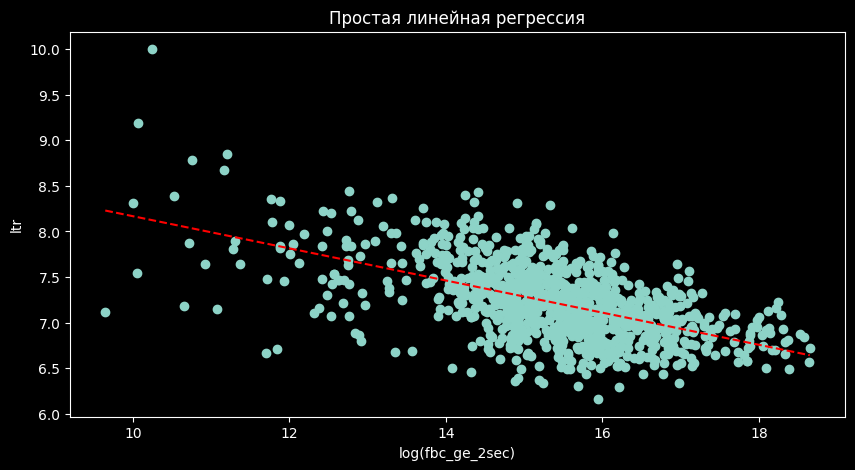

In [175]:
X = t1['fbc_ge_2sec']
y = t1['ltr']
X_log = np.log(X)
# Преобразовать переменную X в полиномиальные признаки первой степени
poly_features = PolynomialFeatures(degree=1)
X_poly = poly_features.fit_transform(X_log.values.reshape(-1, 1))
# Создать и обучить модель множественной регрессии на полиномиальных признаках первой степени
reg = LinearRegression()
reg.fit(X_poly, y)
# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_
# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)
# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")
# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)
# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)
# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X_log, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('log(fbc_ge_2sec)')
plt.ylabel('ltr')
plt.title('Простая линейная регрессия')
plt.show()

Полиномиальная регрессия

Уравнение регрессии: y = 5.70270724716105e-17x² + -7.027380857351828e-09x + 0.21; R² = 0.18


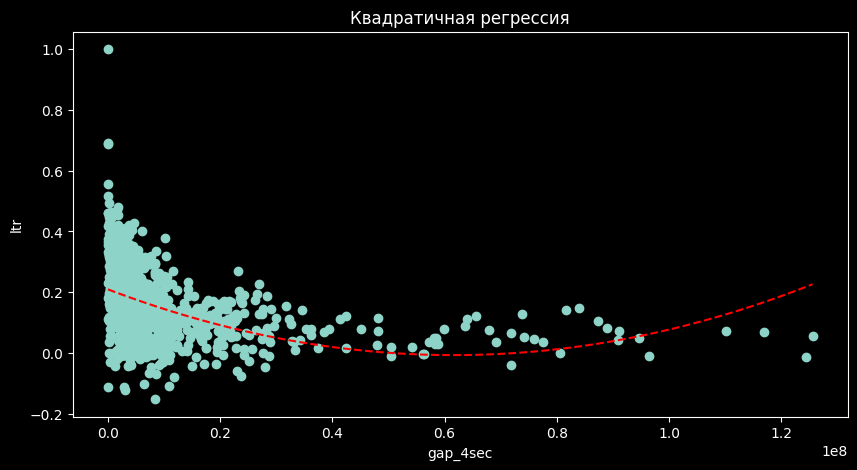

In [165]:
X = t1['fbc_ge_2sec']
y = t1['nps']
# Преобразовать переменную X в полиномиальные признаки второй степени
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X.values.reshape(-1, 1))

# Создать и обучить модель множественной регрессии
reg = LinearRegression()
reg.fit(X_poly, y)

# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_

# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)

# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[2]}x² + {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")

# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)

# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)

# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('gap_4sec')
plt.ylabel('ltr')
plt.title('Квадратичная регрессия')
plt.show()

Полиномиальная регрессия

Уравнение регрессии: y = 0.0030570375802992447x³ + -0.13031535282209555x² + 1.6472861924054418x + 1.57; R² = 0.32


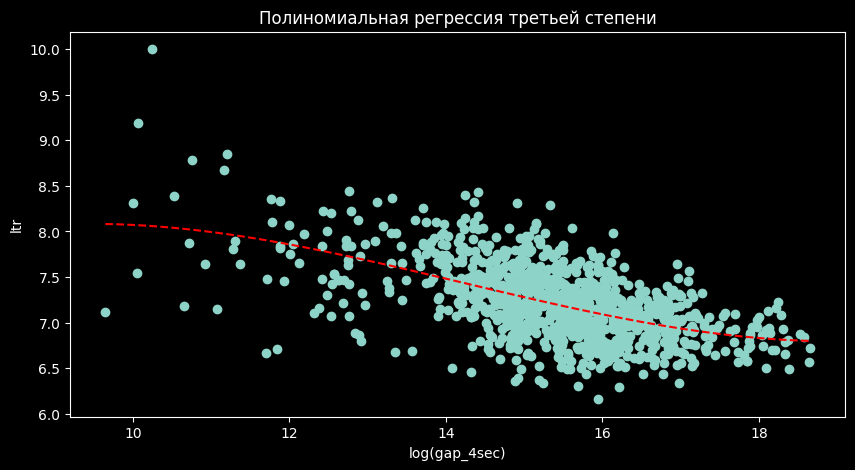

In [166]:
X = t1['fbc_ge_2sec']
y = t1['ltr']
# Применить логарифмическое преобразование к переменной X
X_log = np.log(X)
# Преобразовать переменную X в полиномиальные признаки третьей степени
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X_log.values.reshape(-1, 1))
# Создать и обучить модель множественной регрессии
reg = LinearRegression()
reg.fit(X_poly, y)
# Вычислить коэффициенты и сдвиг регрессии
coef = reg.coef_
c = reg.intercept_
# Вычислить коэффициент детерминации R² для модели
r2 = reg.score(X_poly, y)
# Вывести уравнение регрессии и коэффициент детерминации R² на экран
print(f"Уравнение регрессии: y = {coef[3]}x³ + {coef[2]}x² + {coef[1]}x + {round(c,2)}; R² = {round(r2, 2)}")
# Сгенерировать новые значения для переменной X для построения графика регрессии
x_values = np.linspace(X_log.min(), X_log.max(), 100).reshape(-1, 1)
x_values_poly = poly_features.transform(x_values)
# Сделать прогнозы для новых значений переменной X, используя обученную модель
y_pred = reg.predict(x_values_poly)
# Построить график исходных данных и регрессионной модели
plt.figure(figsize=(10,5))
plt.scatter(X_log, y)
plt.plot(x_values, y_pred, '--r')
plt.xlabel('log(gap_4sec)')
plt.ylabel('ltr')
plt.title('Полиномиальная регрессия третьей степени')
plt.show()

In [288]:
df = t.copy()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['gap_3sec'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('gap_3sec')
axs[1].hist(df['gap_3sec'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(gap_3sec)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['fbc_ge_2sec_pc'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('fbc_ge_2sec_pc')
axs[1].hist(df['fbc_ge_2sec_pc'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(fbc_ge_2sec_pc)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы  
plt.show()


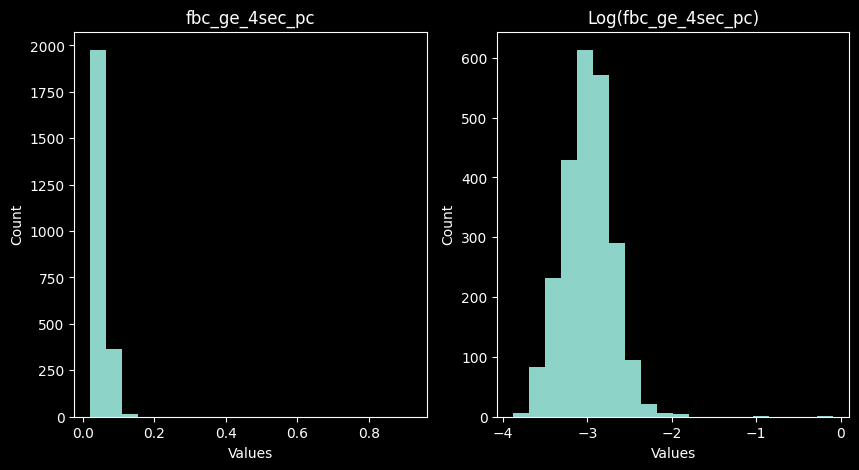

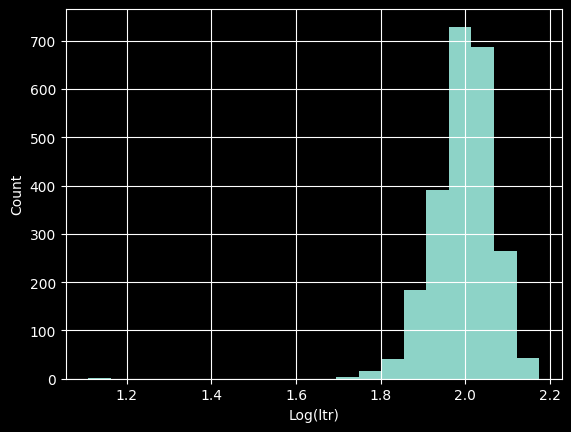

In [291]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) # создаем 1 строку и 2 колонки, указываем размер фигуры
axs[0].hist(df['fbc_ge_4sec_pc'], bins=20) # гистограмма для переменной gap_3sec
axs[0].set_title('fbc_ge_4sec_pc')
axs[1].hist(df['fbc_ge_4sec_pc'].apply(np.log), bins=20) # гистограмма для переменной fbc_ge_2sec_pc с логарифмическим масштабом
axs[1].set_title('Log(fbc_ge_4sec_pc)')
for ax in axs.flat:
    ax.set(xlabel='Values', ylabel='Count') # подписываем оси X и Y для каждой гистограммы
plt.show()
df['ltr'].apply(np.log).hist(bins=20)
plt.xlabel('Log(ltr)')
plt.ylabel('Count')
plt.show()


In [292]:
#чек на мультколлениарность
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[[ 'gap_3sec',  'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'nps']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

          Feature         VIF
0        gap_3sec  276.041085
1  fbc_ge_2sec_pc   88.553339
2  fbc_ge_4sec_pc   84.895863
3             nps    2.956949


мульти регр - 0


In [298]:
t1 = df[['gap_3sec', 'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

poly_features = PolynomialFeatures(degree=1)

X = t1.drop(columns=['ltr']) 
y = t1['ltr']

X_log = np.log(X) 
y_log = np.log(y)

X_poly = poly_features.fit_transform(X_log) 
y_poly = poly_features.fit_transform(y_log.values.reshape(-1, 1))

reg = LinearRegression() 
reg.fit(X_poly, y_poly)

coef = reg.coef_ 
c = reg.intercept_

r2 = reg.score(X_poly, y_poly)

print(f"Уравнение регрессии: ltr = {coef[0, 1]}*ln(gap_3sec) + {coef[0, 2]}*fbc_ge_2sec_pc + {coef[0, 3]}*fbc_ge_4sec_pc + {round(c[0], 2)}; R² = {round(r2, 2)}")

Уравнение регрессии: ltr = 0.0*ln(gap_3sec) + 0.0*fbc_ge_2sec_pc + 0.0*fbc_ge_4sec_pc + 1.0; R² = 0.53


Мульти полиномиальная ~ 01 

In [301]:

t1 = df[['gap_3sec', 'fbc_ge_2sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

X = t1.drop(columns=['ltr']) 
y = t1['ltr']

X_log = np.log(X) 
y_log = np.log(y)

poly_reg = PolynomialFeatures(degree=2) 
X_poly = poly_reg.fit_transform(X_log) 
reg = LinearRegression() 
reg.fit(X_poly, y_log)

coef = np.exp(reg.coef_) 
c = reg.intercept_

r2 = reg.score(X_poly, y_log)

print(f"Уравнение регрессии: ltr = {round(c, 2)} + {round(coef[0], 2)}*gap_3sec + {round(coef[1], 2)}*fbc_ge_2sec_pc + {round(coef[2], 2)}*fbc_ge_4sec_pc + {round(coef[3], 2)}gap_3secfbc_ge_2sec_pc + {round(coef[4], 2)}gap_3secfbc_ge_4sec_pc + {round(coef[5], 2)}fbc_ge_2sec_pcfbc_ge_4sec_pc; R² = {round(r2, 2)}")

Уравнение регрессии: ltr = 1.46 + 1.0*gap_3sec + 0.01*fbc_ge_2sec_pc + 7.66*fbc_ge_4sec_pc + 15.62gap_3secfbc_ge_2sec_pc + 63.95gap_3secfbc_ge_4sec_pc + 1.85fbc_ge_2sec_pcfbc_ge_4sec_pc; R² = 0.1


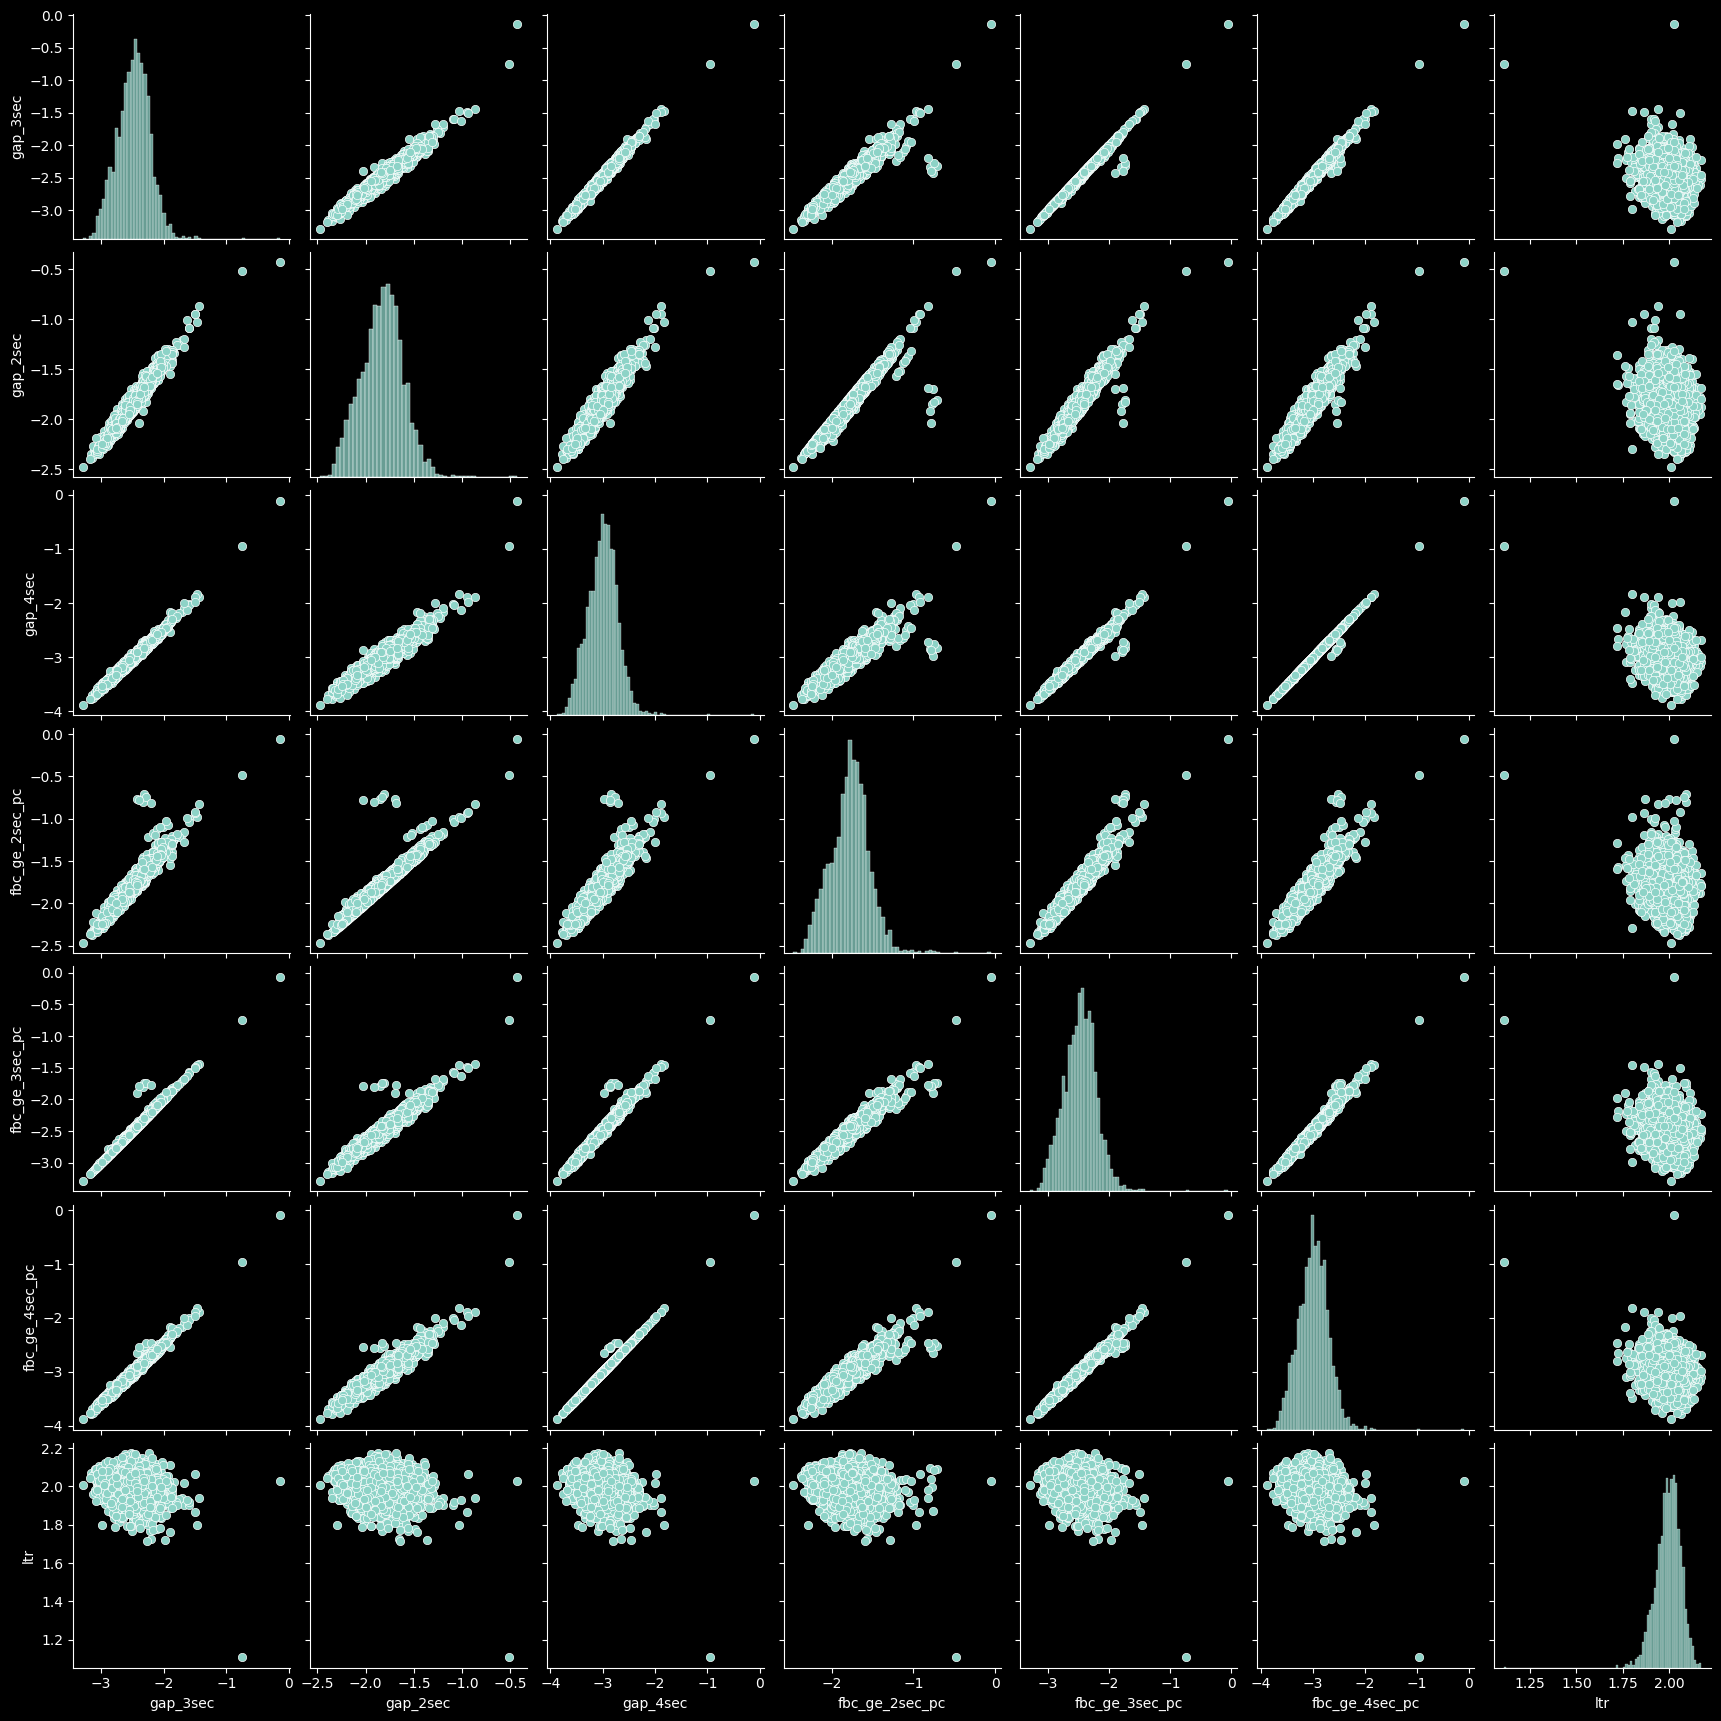

In [302]:
t1 = df[['gap_3sec', 'gap_2sec', 'gap_4sec', 'fbc_ge_2sec_pc', 'fbc_ge_3sec_pc', 'fbc_ge_4sec_pc', 'ltr']]

# создать датафрейм без зависимой переменной
t1_without_ltr = t1.drop(columns=['ltr'])

# добавить логарифмы переменных
t1_log = pd.DataFrame(np.log(t1_without_ltr), columns=t1_without_ltr.columns)

# объединить логарифмы переменных с целевой переменной
t1_log['ltr'] = np.log(t1['ltr'])

# нарисовать графики для каждой пары переменных
sns.pairplot(t1_log)